In [3]:
import pickle
import os
import numpy as np
GTEx_directory = '/hps/nobackup/research/stegle/users/willj/GTEx'
import matplotlib.pyplot as plt
%matplotlib inline

/homes/willj/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/homes/willj/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
tissue = 'Lung'
[X_matrix, y_pheno] = pickle.load(open(os.path.join(GTEx_directory, 'data/processed/association_data/expression/inception_50_-1.h5/small/{}/X_y_mean'.format(tissue)),'rb'))

In [3]:
os.listdir(os.path.join(GTEx_directory, 'data/processed/covering_patches/small/Lung/'))[0:1]

['GTEX-1313W-0926']

In [5]:
representations = []
patches = []
for (i,ID) in enumerate(os.listdir(os.path.join(GTEx_directory, 'data/processed/covering_patches/small/Lung/'))[0:10]):
    if i % 1 == 0:
        print (i)
    for batch in os.listdir(os.path.join(GTEx_directory, 'data/processed/covering_patches/small/Lung/',ID)):
        ID = batch.split('_')[0]
        ps = pickle.load(open(os.path.join(GTEx_directory, 'data/processed/covering_patches/small/Lung', ID, batch ), 'rb'))
        if os.path.exists(os.path.join(GTEx_directory, 'data/processed/representations/inception_50_-1.h5/small/Lung', ID, batch )):
#             print (ID, os.path.join(GTEx_directory, 'data/processed/representations/inception_50_-1.h5/small/Lung', ID, batch ))
            rs = pickle.load(open(os.path.join(GTEx_directory, 'data/processed/representations/inception_50_-1.h5/small/Lung', ID, batch ), 'rb'))
            patches.extend(ps)
            representations.extend(rs)
            
            
    
    
    
    

0
1
2
3
4
5
6
7
8
9


In [16]:
i = 537

In [10]:
# for i in np.random.choice(range(1024),50):
sorted_idx = np.argsort(np.array(representations)[:,i])[::-1]
top_patches = np.array(patches)[sorted_idx][0:100]

In [17]:
np.array(representations)[:,i][sorted_idx][j]

NameError: name 'j' is not defined

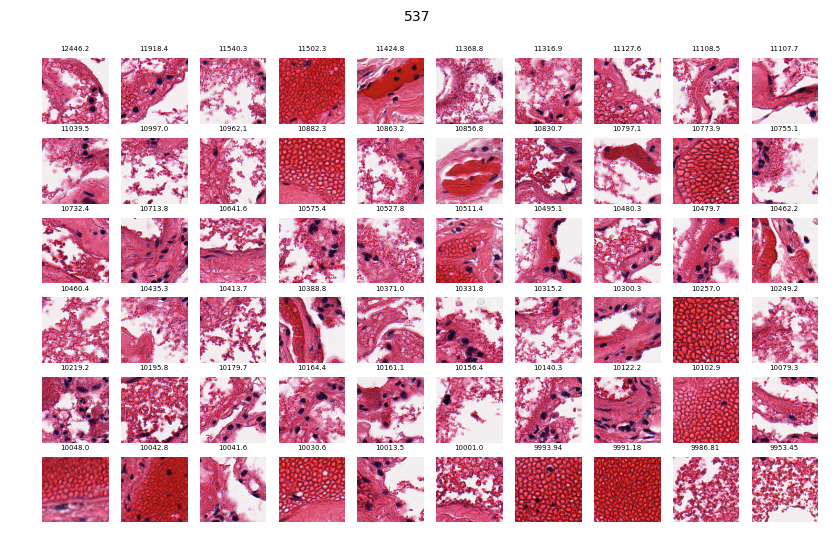

In [30]:
f, a = plt.subplots(6,10, figsize=(10,6))
f.suptitle(i)
for j in range(60):
    a.flatten()[j].imshow(top_patches[j])
    a.flatten()[j].axis('off')
    a.flatten()[j].set_title(np.array(representations)[:,i][sorted_idx][j],size=5)